In [1]:
from ml_toolkit.data_handler import DataHandler
from ml_toolkit.feature_engineer import FeatureEngineer
from ml_toolkit.visualizer import Visualizer

2025-06-14 12:45:59.923260: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
start_date="2020-1-1 00:00"
end_date="2024-07-29 21:00"

# Load the data
df_GBP_USD_H4 = DataHandler.load_data('../fin_data/GBP_USD_H4.pkl', start_date, end_date)
df_EUR_USD_H4 = DataHandler.load_data('../fin_data/EUR_USD_H4.pkl', start_date, end_date)
df_GBP_JPY_H4 = DataHandler.load_data('../fin_data/GBP_JPY_H4.pkl', start_date, end_date)
df_AUD_USD_H4 = DataHandler.load_data('../fin_data/AUD_USD_H4.pkl', start_date, end_date)
df_EUR_CHF_H4 = DataHandler.load_data('../fin_data/EUR_CHF_H4.pkl', start_date, end_date)
df_EUR_GBP_H4 = DataHandler.load_data('../fin_data/EUR_GBP_H4.pkl', start_date, end_date)
df_XAU_USD_H4 = DataHandler.load_data('../fin_data/XAU_USD_H4.pkl', start_date, end_date)

Loading raw data from pickle file: '../fin_data/GBP_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00
Loading raw data from pickle file: '../fin_data/EUR_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00
Loading raw data from pickle file: '../fin_data/GBP_JPY_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00
Loading raw data from pickle file: '../fin_data/AUD_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00


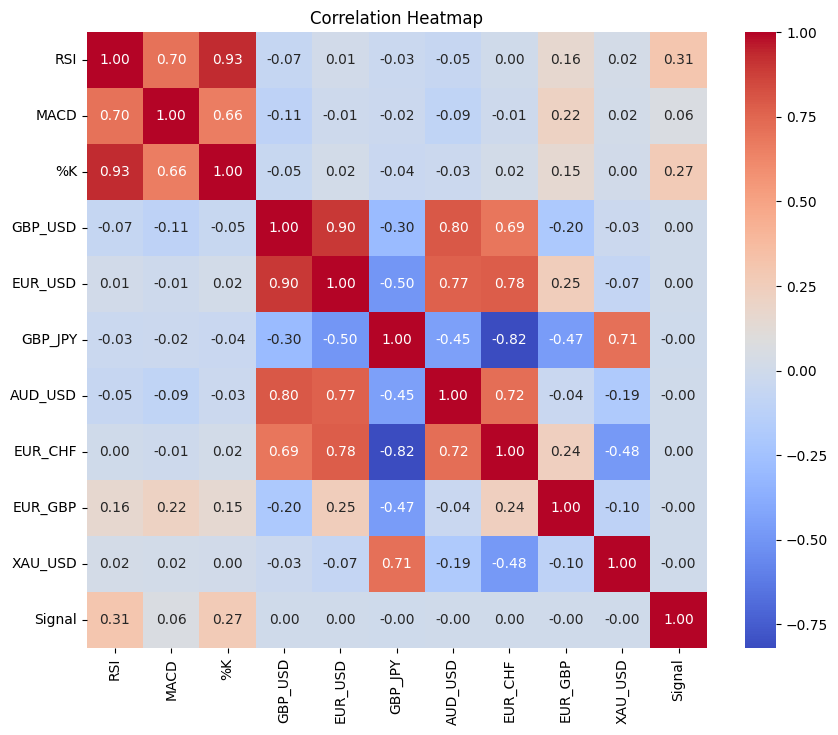

In [3]:
# Define features
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', '%K', 'CO', 'CU', 'MA50']
            
# Feature Engineering
df, time, X, y = FeatureEngineer.add_features(df=df_GBP_USD_H4, features=features)
df.drop(['Signal'], axis=1, inplace=True)

df['Signal'] = FeatureEngineer.find_peaks_and_valleys(df[['Time', 'Close']], distance=5, prominence=0.005)

df['GBP_USD'] = df_GBP_USD_H4['Close']
df['EUR_USD'] = df_EUR_USD_H4['Close']
df['GBP_JPY'] = df_GBP_JPY_H4['Close']
df['AUD_USD'] = df_AUD_USD_H4['Close']
df['EUR_CHF'] = df_EUR_CHF_H4['Close']
df['EUR_GBP'] = df_EUR_GBP_H4['Close']
df['XAU_USD'] = df_XAU_USD_H4['Close']


# Specify features and target in financial dataset
features = ['RSI', 'MACD', '%K', 'GBP_USD', 'EUR_USD', 'GBP_JPY', 'AUD_USD', 'EUR_CHF', 'EUR_GBP', 'XAU_USD']
target = ['Signal']

# --- Heatmap Visualization ---
Visualizer.plot_correlation_heatmap(df, features, target)